<h1 align="center">Pridicting the Survival of Titanic Passangers</h1>

<h2 align="center">1. Introduction</h2>

<p style='text-align: justify;'> In this tutorial we will go through the data science pipeline of  data collection, management,Exploratory data analysis, Hypothesis testing and Machine Learning and finally a summary of insights. To do this we're going to use the Titanic dataset and attempt to pridict whether or not a passanger survives. The dataset was obtained from <a href='https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic.html'>Vanderbilt University,Department of Biostatistics</a>. This tutorial is aimed at a complete beginner in Data Science and I will attempt to walk you through the complete pipeline. 
</p>


   <center><img src="Titanic_2.jpg" alt="centered image" height="350" width="600"> </center>

<h3 align="center">1.1 Background Information</h3>

<p style='text-align: justify;'>The Titanic was a British luxury passanger liner that sank after hitting an iceberg, during its first voyage, on April 14-15,1952. At the time it was one of the deadliest maritime disasters, killing about 1,500 passangers and personnel.Being one of the most famous tragedies in modern history, it is a subject of several movies long before James Cameron's 1997, Titanic<a href='https://en.wikipedia.org/wiki/List_of_films_about_the_Titanic'>*</a>, which was incidentally the first movie I ever saw, at least the first one I remember.</p>

### Motivation?

<h3 align="center">1.2 Utilities we will use</h3>

We will first import the following libraries
* Numpy
* Pandas
* Matiplotlib
* Seaborn
* Scikit-learn
* Missingno
* Statsmodels

In [92]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno as msno
import statsmodels.api as sm

<h2 align="center">The Data Science Pipeline</h2>

The data science pipeline is a series of steps towards obtaining,cleaning,visualizing,modeling and interpreting data. It consists of,
* Data collection - Feching and obtaining the data
* Data processing - Convert the data into a format suitable for manipulation, Look for missing and/or invalid values and handel them appropriately 
* Exploratory analysis & Data visualization - Use visualizations to examine the data and spot patterns and trends
* Analysis,Hypothesis testing & Machine Learning - Define the null and alternative hypothesis and test it 
* Insight & Policy decision - Summary of insights attained and where to go next

   <center><img src="data_life.jpg" alt="centered image" height="250" width="600"> </center>

<h2 align="center">I. Data Collection</h2>

The Titanic dataset is one of the most used datasets and it has been avaliable in various forms since 1999. The original dataset was compiled from sources such as the Encyclopedia Titanica, Titanic: Triumph and Tragedy by various researchers. The version of the dataset we are going to use contains information about 1309 passangers. Other more polished versions of the data are avaliable on sites like Kaggle but it is split into training and testing sets and we would like to explore the dataset before we do that, plus we don't want to miss out on the fun of wrangling ang cleaning the data ourselves. Our dataset has 14 variables for each passanger and a complete description of it can be found here<a href='https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3info.txt'>*</a>. Here is a brief description,</p>

 ####  VARIABLE DESCRIPTIONS:
* pclass:   Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
* survival:   Survival (0 = No, 1 = Yes)
* name:  Name   
* sex:  Sex
* age:  Age
* sibsp:   Number of Siblings/Spouses Aboard
* parch:   Number of Parents/Children Aboard
* ticket:   Ticket Number
* fare:   Passenger Fare
* cabin:   Cabin
* embarked:   Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* boat:   Lifeboat Number (if the passanger survived)
* body:   Body Identification Number (if the passanger did not survive and the body was recovered)
* home.dest:   Home/estination


<h2 align="center">II.  Data Management</h2>

The first step in managing our data is to use pandas to import the csv file we obtained from here[*](https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.csv) and convert it to a dataframe which will make manipulation easier.

In [74]:
df = pd.read_csv('Titanic.csv') # import the dataset

In [4]:
df.head() # display the first five entries

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


As it can be seen from the table above the dataset contains missing values,those with a question mark. We need to replace all these values to something appropriate for missing data so pandas will recognize its missing and we are able to visulize the extent of the missingness. Because right now as far as pandas is concerned we have complete dataset,with some question marks. To do that we don't need to iterate through the whole dataset, Pandas will let us do that with a single line!

In [75]:
df = df.replace("?",np.NAN) # replace missing values with something more appropriate for pandas

In [6]:
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


As you can see above now all the ?'s are now replaced with NaN, that will come in very handy shortly. But for now let's use pandas inbuilt function describe to summarize our dataset.

In [7]:
df.describe()

,pclass,survived,sibsp,parch
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.498854,0.385027
std,0.837836,0.486055,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,9.000000


We can see that the dataframe contains 1309 entries and various summary statstics such as min,max,mean and std for all the numeric columns. But as you probably noticed we only have four columns in the table above but we had 8 numeric variables in the dataframe. To see what is going on let's use another pandas function dtypes, which will give us the data type of each variable. 

In [8]:
df.dtypes # check for data types

pclass        int64
survived      int64
name         object
sex          object
age          object
sibsp         int64
parch         int64
ticket       object
fare         object
cabin        object
embarked     object
boat         object
body         object
home.dest    object
dtype: object

We seem to have a table full of objects! We need to convert these columns to numeric type. We can do this multiple ways but the easiest is to use apply and to_numeric, we also want to convert the invalid/non-numeric enteries in these columns to NaN, so we'll set the errors flag to coerce. 

In [76]:
df[['age','fare','ticket','fare','boat','body']] = df[['age','fare','ticket','fare','boat','body']].apply(pd.to_numeric,errors='coerce') # convert columns to numeric

We can now move onto visualising all the missing values. The easiest,and perhaps visually appealing, way to to it is by using the Missingno library.

<AxesSubplot:>

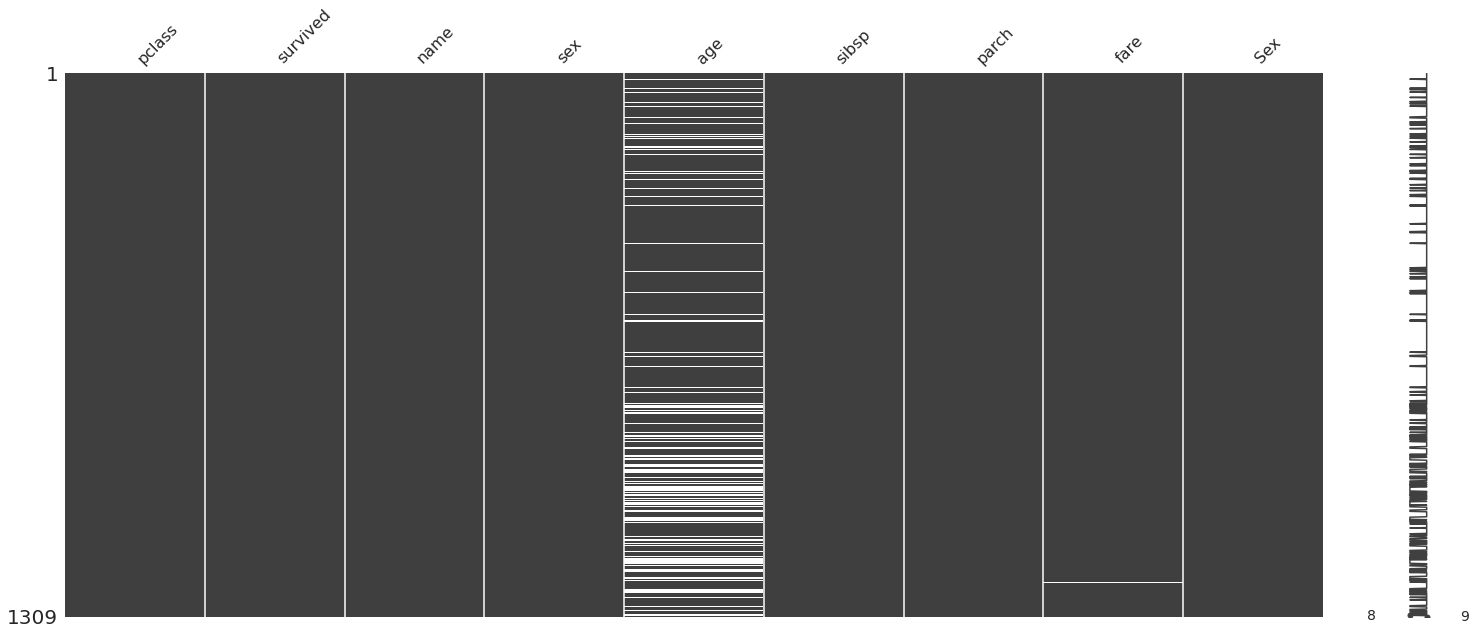

In [37]:
msno.matrix(df)

As you can see the columns 'body' and 'cabin' are mostly empty, also to a lesser extent, 'boat' and 'home.dest'. We can use pandas to count exactly how many missing values we have in each column.

In [77]:
print(df.isnull().sum()) # count the number of missing values in each column 

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket        352
fare            1
cabin        1014
embarked        2
boat          911
body         1188
home.dest     564
dtype: int64


To see if the missing values in each column have relationships we can sort the dataframe based on the 'age' columns order,all the NaN's will be at the bottom, and see the effect it will have on the other column's missing values.

<AxesSubplot:>

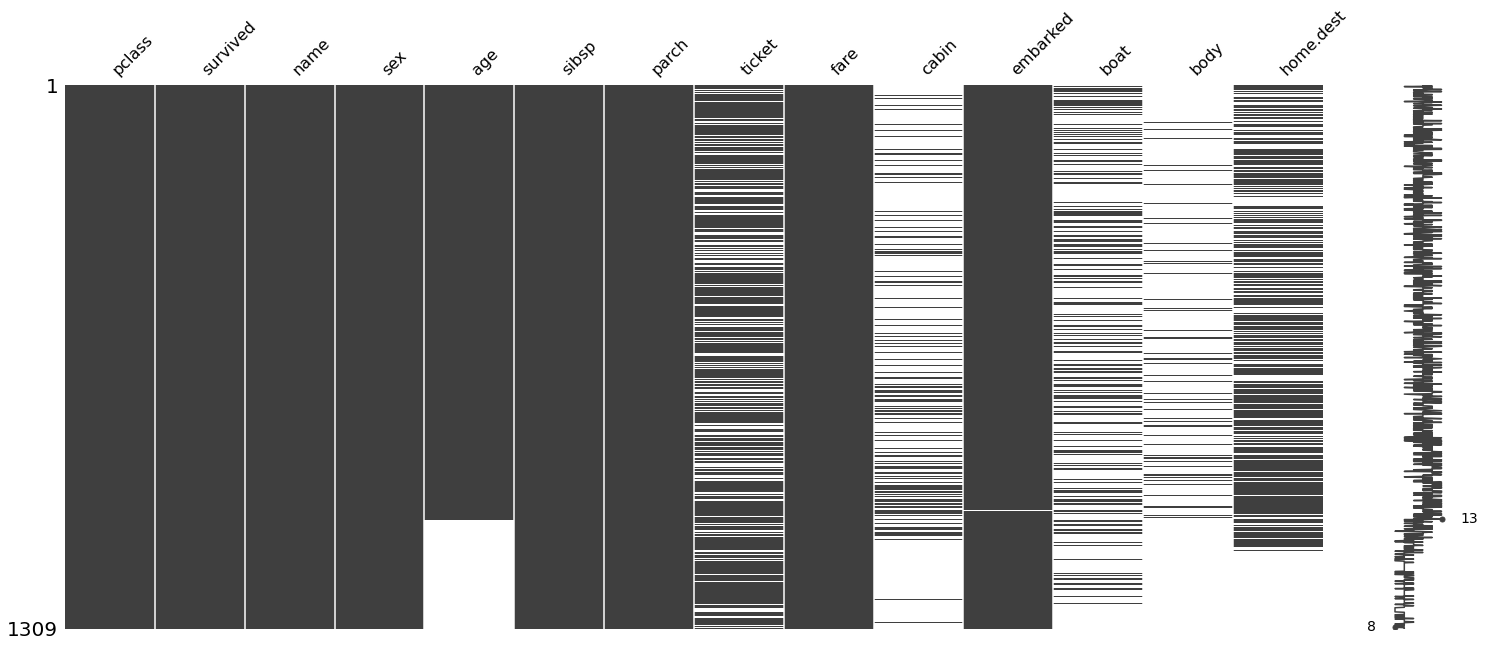

In [12]:
msno.matrix(df.sort_values('age'))

It seems like the missing values in 'cabin','body' and 'home.dest' columns correlate with the missing values in 'age'. Which is a perfect interlude to introduce the types of missing data.
* Missing Completely at Random (MCAR) - The missingness is not related to any observed or unobserved data.
* Missing at Random (MAR) - The missingness is related to the observed data and is not because of some unobserved data.
* Missing Not at Random (MNAR) - Missingness relationship cannot be simplified: it depends on unobserved data.

To identify which type of missing data we are dealing with here lets use the Missingno library once more to plot the correlation of missing data in different columns.

<AxesSubplot:>

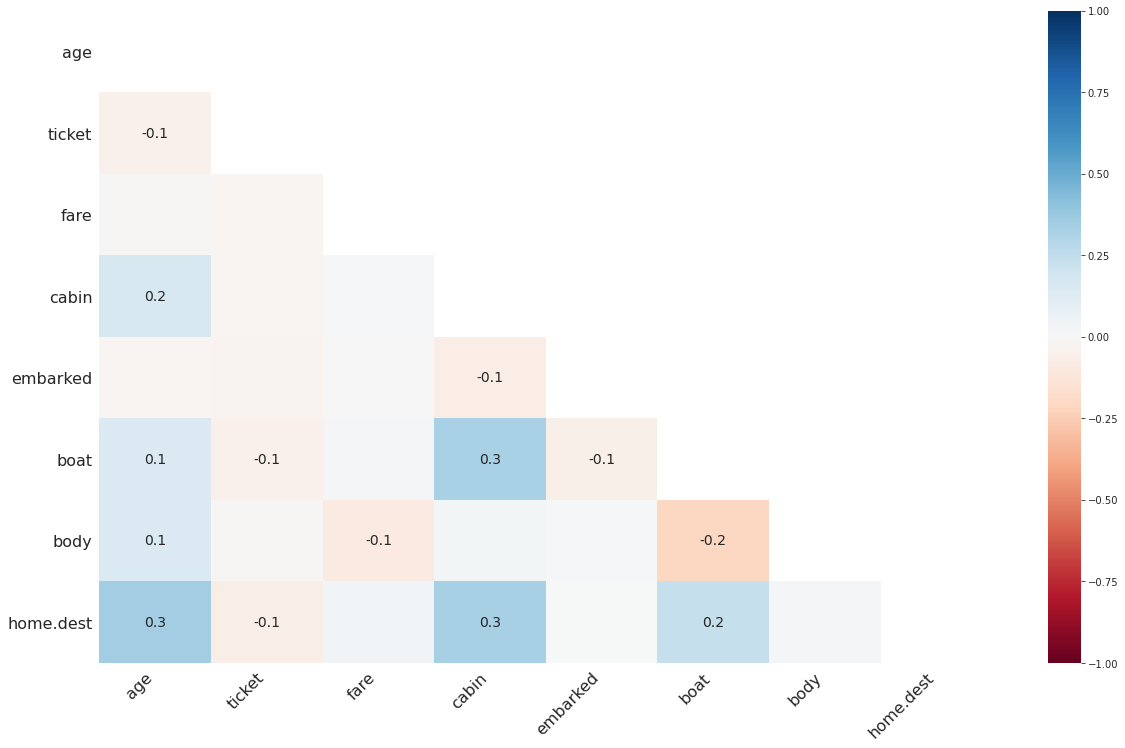

In [79]:
msno.heatmap(df)

<p style='text-align: justify;'> It looks like the missing values in 'age' have a positive correlation with missing values from columns 'cabin','boat','body' and 'home.dest'; And a negative correlation with the column for ticket number. Entries for passangers that do not have age also tend to have missing values in ticket number,cabin,boat,body and home destination columns also. One possiblity is that passangers that didn't enter or disclose their age didn't also disclose their home destination and cabin number. It looks like the missingness in age can't be simplified and it is related to some unobserved data. Therefore it is most likely MNAR, which is unfortunate because that means we can't just ignore it.The reason for that is MNAR means we can't model the missingness and if we just ignore it we might introduce biases to our hypothesis and conclusion. Later,in the modeling stage, we will compare  the accuracy of pridictions when delete the missing values vs imputate, filling in the missing values.
</p>
<p style='text-align: justify;'> For now we will keep the age and drop the 'cabin' column because its mostly empty and we will make the assumption that the cabin number wouldn't be a useful feature for pridiction. The same argument can be made for 'home.dest' and 'embarked' because the source or destination will not likely affect the survival of a passanger. The 'boat' and 'body' columns can be a little tricky, because if a body is recovered the passanger is dead and if the passanger made it to a life boat they likely survived and that wouldn't help to pridict survival. The ticket number and name columns are also not useful. So we will drop columns 'cabin','body','boat','home.dest','name' and 'ticket'. Before moving to the exploratory data analysis stage I would like to point out that we can come back to the data management and even collection stage. As the data science pipeline diagram in the introduction shows we can move back and forth between stages when we need to.  </p>

In [81]:
df = df.drop(columns=['embarked','cabin','body','boat','home.dest','name','ticket']) # drop columns

In [83]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.0000,0,0,211.3375
1,1,1,male,0.9167,1,2,151.5500
2,1,0,female,2.0000,1,2,151.5500
3,1,0,male,30.0000,1,2,151.5500
4,1,0,female,25.0000,1,2,151.5500


We now have a clean dataset,except age which we will deal with later.

<h2 align="center">III. Exploratory Data Analysis</h2>

In this stage we will use different kinds of plots to visualize and analyze our data.Let's first plot the numbers of passangers that survived and died. We can use Matiplotlib and Seaborn libraries we imported earlier. 

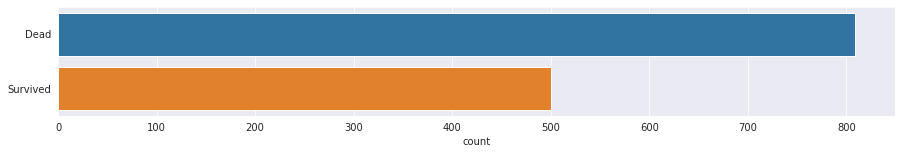

In [84]:
fig, ax = plt.subplots()

ax = sns.countplot(y='survived', data=df)
ax.set_yticklabels(['Dead','Survived'])
fig.set_figwidth(15)
fig.set_figheight(2)
ax.set_ylabel('')

plt.show()

It looks like there were more passangers that died than survived. We can also use pandas to group by features and calculate the percentage of passangers that survived.Let's try to differentiate by sex first.

In [85]:
df[['sex','survived']].groupby('sex').mean() # calculate the percentage of passangers that survived based on sex

,survived
sex,
female,0.727468
male,0.190985


We can see that about 73% of females and 19% of males survived. We can do the same thing with passanger classes. 

In [22]:
df[['pclass','survived']].groupby('pclass').mean()# calculate the percentage of passangers that survived based on passanger class

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


It looks like  about 62% of the first class passangers survived while only ~43% and ~25% of the second and third class passangers did, respectively. We can make a plot of these percentages using matiplotlib and seaborn. 

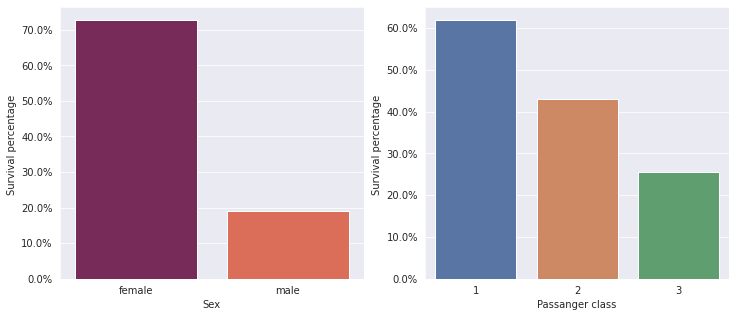

In [86]:
fig, (ax1,ax2) = plt.subplots(1,2) # set up side by side plots
# custom y label formater, to add %
def percent(x,pos):
    return '{:1.1f}%'.format(x*100)

 

ax1 = sns.barplot(ax=ax1,x='sex',y='survived',data=df,ci=None,palette="rocket") # left plot,male vs female
# label axes
ax1.set_xlabel('Sex')
ax1.set_ylabel('Survival percentage ')

# use custom formatter
ax1.yaxis.set_major_formatter(percent)

ax2 = sns.barplot(ax=ax2,x='pclass',y='survived',data=df,ci=None,palette="deep") # right plot, passanger classes
ax2.yaxis.set_major_formatter(percent)

ax2.set_xlabel('Passanger class')
ax2.set_ylabel('Survival percentage ')
sns.set_style("darkgrid")

fig.set_figwidth(12)
fig.set_figheight(5)

To explore relationships with features further we can use a correlation plot, but to do that we will first need to encode the sex column in numerical format. We will create a new column 'Sex' and encode sex as 1 for female and 0 for male. A lambda function coupled with pandas is one way to it.

In [87]:
df['Sex'] = df['sex'].apply(lambda x: 1 if x=='female' else 0) # encode sex and add in new column

We can now use seaborn to plot the correlation between our variables.

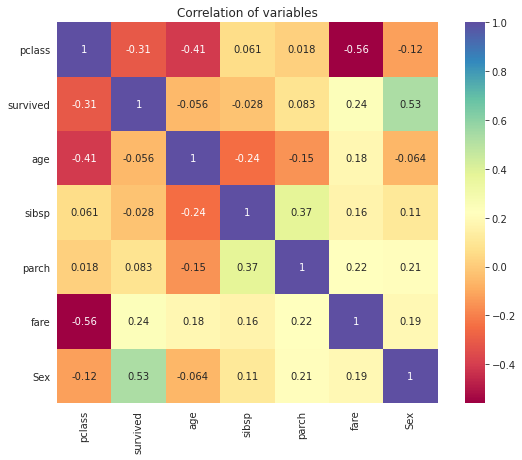

In [89]:
fig, ax = plt.subplots() # create a matiplotlib plot
ax = sns.heatmap(df.corr(),annot=True,cmap=sns.color_palette("Spectral", as_cmap=True),square=True)

ax.set_title("Correlation of variables") # label title
fig.set_figwidth(10)
fig.set_figheight(7)

Base on the above plot we can make some observations
* We can see that pssanger class has a negative correlation with survived,which seems odd but  
passanger class goes from 1-3, First class being more expensive,and it looks like passangers in first class had more chance of survival. As you can also see passanger class also negatively correlates with fare,which makes sense because first class costs more money. 
* Also sex seems to highly correlate with survival, which also makes sense because women and children get priority while rescue.
* As you probably noted, age seems to barely correlate with survival, which doesn't make sense is but can be due to the missing values in our data. 

Let's explore this further by analysing the spread of our data, based on age and survival, for now we will drop the missing values in age and use a histogram plot.

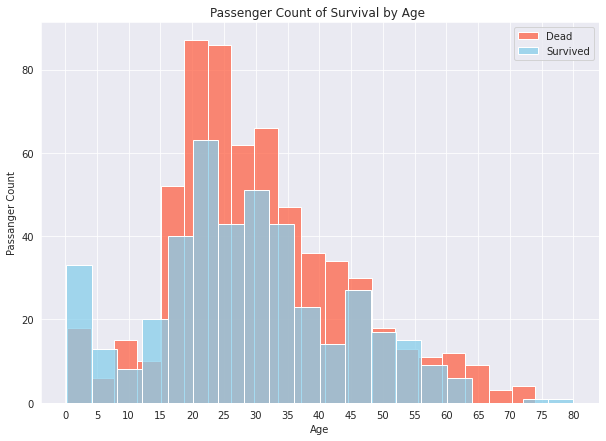

In [90]:
fig, ax = plt.subplots()

sur = df.loc[df['survived'] == 1] # extract a dataframe of survivors
dead = df.loc[df['survived'] == 0] # extract a dataframe of dead


ax = sns.histplot(data = dead['age'].dropna(),color="tomato",bins=20,label="Dead")
ax = sns.histplot(data = sur['age'].dropna(),color="skyblue",bins=20,label="Survived")

sns.set_style("darkgrid")

ax.set_title('Passenger Count of Survival by Age ')
ax.set_xlabel('Age')
ax.set_ylabel('Passanger Count')
ax.set_xticks(np.arange(0,85,5.0))# change the default xticks
ax.legend()
fig.set_figwidth(10)
fig.set_figheight(7)

Our faith in humanity can be restored! It looks like childern were gived perference and more childern survived than died,for age under 20,except for ages between 10-15,which can be due to missing data we droped or maybe there were more children in the 10-15 group. Let's make note of the anomaly, to perhaps explore further later,and move onto looking at the relationship with features we have full data, class and sex.</p>
Let's plot the chance of survival between these two features. We can use seaborn to do a barplot.

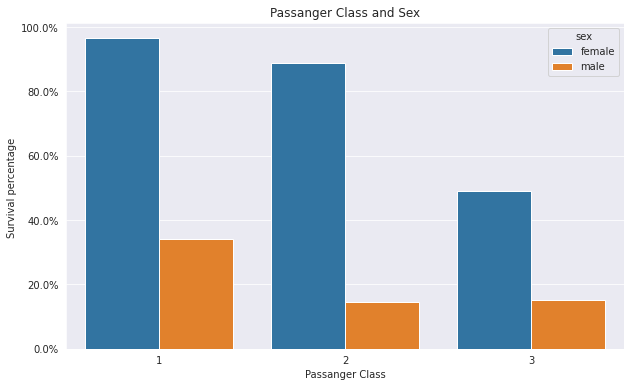

In [91]:
fig, ax = plt.subplots()  # create a matiplotlib plot
# custom y axis formater
def percent(x,pos): 
    return '{:1.1f}%'.format(x*100)

ax1 = sns.barplot(x='pclass',y='survived',data=df,hue='sex',ci=None) # seaborn barplot
ax1.set_title('Passanger Class and Sex')
ax1.set_xlabel('Passanger Class')
ax1.set_ylabel('Survival percentage ')
ax1.yaxis.set_major_formatter(percent)
sns.set_style("darkgrid")


fig.set_figwidth(10)
fig.set_figheight(6)

From the plot above female first class passangers had the highest chance of survival and males in the second and third class had the least chance. Now would be a perfect time to move on to defining the null hypothesis and an alternative to test in the next stage.

   <center><img src="Problem.png" alt="centered image" height="250" width="450"> </center>

<h2 align="center">IV. Hypothesis Testing & Machine Learning</h2>

A hypothesis is an educated guess we can make about our data and it should be verifiable. A null hypothesis is a speculation that there is no significant pridicted difference between our comparison groups where as the alternative hypothesis is the pridicted difference does exist. </p>
In our case the null hypothesis would be,***there is no difference in survival within different groups***, and the alternative hypothesis is that ***there is a reason why the means of survival between groups is diffrent, and its not chance***. We will first need to reject the null hypothesis and we can do that by using the statsmodel library to obtain p-values. </p>
The p-value of a variable represents the probability that the coefficient equals 0. We want a p-value that is less than 0.05 if it is we can reject the null hypothesis. 


Let's first make a copy of our dataset we can modify without worrying about losing our work so far. We will then drop column 'sex' because its already encoded as a number in the "Sex" column.

In [107]:
dff =df.copy() # amke a copy 
dff = dff.dropna() # drop missing 
dff = dff.drop(columns=['sex']) # drop sex column

In [108]:
X = dff.drop('survived',axis=1) # input variable X is all columns except survived
y = dff['survived'] # output variable y the survived column

In [109]:
# fit the data into a linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit() # X input var and y output var

In [102]:
model.pvalues # display p-values

const     9.090637e-32
pclass    1.423767e-19
age       7.312209e-10
sibsp     3.935290e-04
parch     5.549757e-01
fare      3.450552e-01
Sex       1.710550e-68
dtype: float64

As we can see above the the p-values for all variables except parch and fare are well below 0.05 
,so ***we can reject the null hypothesis and say that there is a relationship between passanger class,age,sex and survival and its not random***.</p>
We can move onto using a machine learning model to pridict the chance of survival of a passanger. Scikit-learn is a convenient library which contains assortment of machine learning tools that helps us do that.

In [28]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Scikit-learn has many machine learning models we can choose from, but for this tutorial we will limit our options to
*  <a href='https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn'>K Neighbors Classifier</a>
* <a href='https://scikit-learn.org/stable/modules/svm.html'>Support Vector Machines </a>
* <a href='https://medium.com/swlh/decision-tree-classification-de64fc4d5aac'>Decision Tree Classifier </a> 
* <a href='https://medium.com/@taplapinger/tuning-a-random-forest-classifier-1b252d1dde92'>RandomForestClassifier </a> 

Each model is worthy of a tutorial by itself but for now I'll just leave you with a link for further refercence for each model. 

First lets set up a list containing all our models intialized with a random state for reproducibility, then we will loop through each model and calculate the mean accuracy of our pridictions to compare their performance. We will then use sklearns standard scaler to transform the data into usable form for our models.


In [30]:
# set up models with randon states for  reproducibility
models = [LogisticRegression(random_state=42),SVC(random_state=42),KNeighborsClassifier(),DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42)] 


In [110]:
X = dff.drop('survived',axis=1)
y = dff['survived']
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)


In [111]:

result = pd.DataFrame(columns=['Name','Mean accuracy']) # dataframe containing models accuracy

for i,model in enumerate(models):
    result.loc[i,'Name'] = model.__class__.__name__ # obtain the name of the model
    cv_res = cross_val_score(model,X,y=y,cv = 20) # calculate the 20 fold cross validation result
    result.loc[i,'Mean accuracy'] = cv_res.mean() # append the mean of the cross validation result to the dataframe 


In [112]:
result

,Name,Mean accuracy
0,LogisticRegression,0.771263
1,SVC,0.794975
2,KNeighborsClassifier,0.78389
3,DecisionTreeClassifier,0.737536
4,RandomForestClassifier,0.756767


<p style='text-align: justify;'>As we can see above Support vector machins (SVC) had the highest mean accuracy and decicion tree the lowest, but all our models had a respectable low to high 70s accuracy. We can now explore replacing the missing age values by imputation. We can use sklearns KNNImputer to do that and check if the accuracy of our pridictions increases. KNNImputer uses the mean of n neighbors i the training set to fill in each missing value.Check <a href='https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html'>this</a> link for further reference. 

In [113]:
from sklearn.impute import KNNImputer

dff_knn =dff.copy()
knn_imputer = KNNImputer(n_neighbors=2,weights="uniform")
dff_knn['age'] = knn_imputer.fit_transform(dff_knn[['age']])
dff_knn['fare'] = knn_imputer.fit_transform(dff_knn[['fare']])

In [121]:
print(dff_knn.isnull().sum()) # count the number of missing values in each column 

pclass      0
survived    0
age         0
sibsp       0
parch       0
fare        0
Sex         0
dtype: int64


In [117]:
X = dff_knn.drop('survived',axis=1)
y = dff_knn['survived']
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

In [124]:
res = pd.DataFrame(columns=['Name','Mean accuracy'])

for i,model in enumerate(models):
    res.loc[i,'Name'] = model.__class__.__name__
    cv_res = cross_val_score(model,X,y,cv = 20)
    res.loc[i,'Mean accuracy'] = cv_res.mean()

In [125]:
res

,Name,Mean accuracy
0,LogisticRegression,0.771263
1,SVC,0.794975
2,KNeighborsClassifier,0.78389
3,DecisionTreeClassifier,0.737536
4,RandomForestClassifier,0.756767


Imputaion seems to make no difference on the accuracy. Let's now split the data and choose one algorithm to optimize. I choose Random Forest Classifier through trial and error because I got the best accuracy results from it.I also chose to use 100 estimators for the same reasons. I'm sure one can further fine tune and optimize the above algorithms to achive better accuracy.

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42) # split data


In [127]:
random_forest = RandomForestClassifier(n_estimators=100) # chose 
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [128]:
acc_random_forest

98.21

It looks like we scored 98% on accuracy, on the test set, so let's not get overexcited and check accuracy of pridictions in the whole dataset.

In [129]:
acc_random_forest = round(random_forest.score(X, y) * 100, 2)

In [130]:
acc_random_forest

94.07

That is more likely! 

<h2 align="center">V. Insights </h2>

We have learned that we can use attributes sex and passanger class to make a pridiction of a paggangers survival. More importantly we have gone through the complete data science pipeline and used it to pridict the chance of survival of passangers in a shipwreck more than 100 years ago, which is very cool. I hope you enjoyed this tutorial and learned something, I definaltly did. Thank you for your time.